In [1]:
from collections import Counter
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print('Overall # of samples is', y.shape[0])
print('Size of the features is:', X.shape)

Overall # of samples is 70000
Size of the features is: (70000, 784)


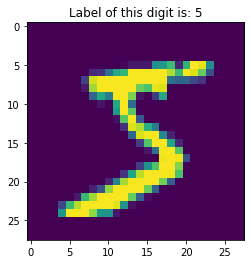

In [2]:
def show_digit(x_vec, label):
    x_mat = x_vec.reshape(28, 28)
    plt.imshow(x_mat)
    plt.title('Label of this digit is: ' + label)
    plt.show()

show_digit(X[0], y[0])

In [3]:
n_train = 6000
n_test = 1000
split_loc = 60000 # train and test split at location of 60k

X_train, y_train = X[:n_train,:], y[:n_train]
X_test, y_test = X[split_loc:split_loc + n_test, :] , y[split_loc:split_loc+n_test]

In [4]:
# converting the above numpy arrays to pandas dataframe
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)

# plot the # of sample for each category in Training and Testing

In [5]:
y_train_df = pd.DataFrame(data = y_train, columns = ['class'])
y_test_df = pd.DataFrame(data = y_test, columns = ['class'])

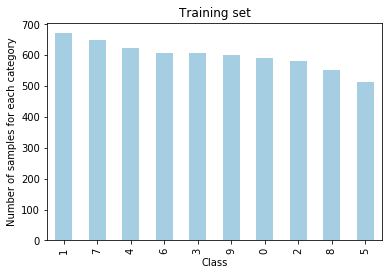

In [6]:
y_train_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Training set')
plt.show()

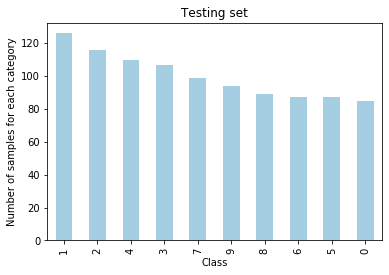

In [7]:
y_test_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Testing set')
plt.show()

# code for performing knn classification

In [8]:
# calculate euclidean distance
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [9]:
# a list to store euclidean distance
train_distance_list = []
# a list to store index
train_ind_counter = []
# a list with all the K values
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,21]
# creating a list of list for storing the predictions for each value of K
train_pred_lists = [[] for _ in range(len(k_values))]
"""
Each list in your list is a reference to the same object. You modify one, you see the modification in all of them.
https://urldefense.proofpoint.com/v2/url?u=https-3A__stackoverflow.com_questions_8713620_appending-2Ditems-2Dto-2Da-2Dlist-2Dof-2Dlists-2Din-2Dpython-255Cn&d=DwIGAg&c=h2Fu29X6B8vuaRkwP4jdQg&r=VrA8Wg-NQXRIWiLPbMbwreqPxfnbbNHHEdL8LFUK5DI&m=WrZR3go5H-4T0a0mrchaz1zXbxvWsQ_1_g74MZB-6nI&s=A-p1Rw5fxGX587fhSz4ZRl_uAreZ965twblgt5egE_U&e= """


# training the knn model
# iterating through the training set
for i in range(0,6000):
    train_vec_one = df_train.iloc[i]
    # iterating through the training set
    for j in range(0,6000):
        train_vec = df_train.iloc[j]
        # calculate euclidean distance by calling function dist
        euclidean_dist = dist(train_vec_one,train_vec)
        train_distance_list.append(euclidean_dist)
        # increment the index
        train_ind_counter.append(j)
    
    # dictionary to store all the results
    d = {'index':train_ind_counter, 'distance': train_distance_list}
    # convert dictionary to dataframe
    df = pd.DataFrame(d, columns = ['index', 'distance'])
    # sort in ascending order by euclidean distance
    df_sorted = df.sort_values(by = 'distance')

    # iterate through each value of K
    for K in range(len(k_values)):
        index_list = list(df_sorted['index'][:k_values[K]])
        distance = list(df_sorted['distance'][:k_values[K]])
        res_list = [y_train[i] for i in index_list]
        # now get the count of the max class in result list
        pred_value = max(res_list,key=res_list.count)
        # storing every prediction for K in respective list
        train_pred_lists[K].append(pred_value)
    
    # reinitialize the list
    train_ind_counter = []
    train_distance_list = []

In [10]:
# a list to store euclidean distance
test_distance_list = []
# a list to store index
test_ind_counter = []
# creating a list of list for storing the predictions for each value of K
test_pred_lists = [[] for _ in range(len(k_values))]

# testing the knn model
# iterating through the test set
for i in range(0,1000):
    test_vec = df_test.iloc[i]
    # iterating through the training set
    for j in range(0,6000): 
        train_vec = df_train.iloc[j]
        # calculate euclidean distance
        euclidean_dist = dist(test_vec,train_vec)
        test_distance_list.append(euclidean_dist)
        # increment the index
        test_ind_counter.append(j)
    
    # dictionary to store all the results
    d = {'index':test_ind_counter, 'distance': test_distance_list}
    # convert dictionary to dataframe
    df = pd.DataFrame(d, columns = ['index', 'distance'])
    # sort in ascending order by euclidean distance
    df_sorted = df.sort_values(by = 'distance')

    # iterate through each value of K
    for K in range(len(k_values)):
        index_list = list(df_sorted['index'][:k_values[K]])
        distance = list(df_sorted['distance'][:k_values[K]])
        res_list = [train_pred_lists[K][ind] for ind in index_list]
        # now get the count of the max class in result list
        pred_value = max(res_list,key=res_list.count)
        # storing every prediction in respective list
        test_pred_lists[K].append(pred_value)
        
    # # reinitialize the list   
    test_ind_counter = []
    test_distance_list = []

In [11]:
# calculating results for train set
train_pred = 0
train_pred_result = []
for K in range(len(k_values)):
    # element wise comparison to find the accuracy
    for l1,l2 in zip(train_pred_lists[K], y_train.tolist()):
        if l1 == l2:
            # increment when there is a match
            train_pred += 1
    accuracy = train_pred/6000
    train_pred_result.append((round(accuracy*100,2)))
    print('The train accuracy is '+str(round(accuracy*100,2))+'% for K='+str(k_values[K]))
    train_pred = 0

The train accuracy is 100.0% for K=1
The train accuracy is 97.82% for K=3
The train accuracy is 96.77% for K=5
The train accuracy is 96.05% for K=7
The train accuracy is 95.55% for K=9
The train accuracy is 95.07% for K=11
The train accuracy is 94.8% for K=13
The train accuracy is 94.43% for K=15
The train accuracy is 94.0% for K=17
The train accuracy is 93.73% for K=19
The train accuracy is 93.43% for K=21


In [12]:
# calculating results for test set
test_pred = 0
test_pred_result = []
for K in range(len(k_values)):
    for l1,l2 in zip(test_pred_lists[K], y_test.tolist()):
        if l1 == l2:
            test_pred += 1
    accuracy = test_pred/1000
    test_pred_result.append((round(accuracy*100,2)))
    print('The test accuracy is '+str(accuracy*100)+'% for K='+str(k_values[K]))
    test_pred = 0

The test accuracy is 90.4% for K=1
The test accuracy is 90.9% for K=3
The test accuracy is 91.5% for K=5
The test accuracy is 90.4% for K=7
The test accuracy is 89.8% for K=9
The test accuracy is 88.4% for K=11
The test accuracy is 88.9% for K=13
The test accuracy is 88.3% for K=15
The test accuracy is 87.9% for K=17
The test accuracy is 87.6% for K=19
The test accuracy is 86.8% for K=21


In [13]:
# getting all the results for train and test in a dataframe
df_result = pd.DataFrame()
df_result['K value'] = k_values
df_result['train pred'] = train_pred_result
df_result['test pred'] = test_pred_result
df_result

,K value,train pred,test pred
0,1,100.00,90.4
1,3,97.82,90.9
2,5,96.77,91.5
3,7,96.05,90.4
4,9,95.55,89.8
5,11,95.07,88.4
6,13,94.80,88.9
7,15,94.43,88.3
8,17,94.00,87.9
9,19,93.73,87.6


# plot the curve of Testing accuracy w.r.t. different K values

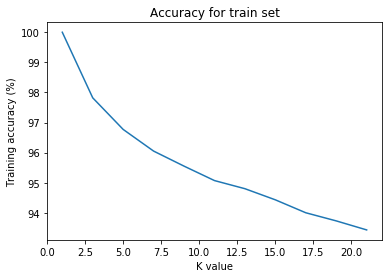

In [14]:
plt.plot(df_result['K value'], df_result['train pred'])
plt.xlabel('K value')
plt.ylabel('Training accuracy (%)')
plt.title('Accuracy for train set')
plt.show()

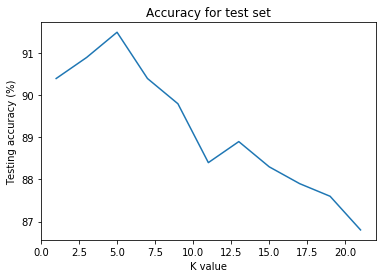

In [15]:
plt.plot(df_result['K value'], df_result['test pred'])
plt.xlabel('K value')
plt.ylabel('Testing accuracy (%)')
plt.title('Accuracy for test set')
plt.show()

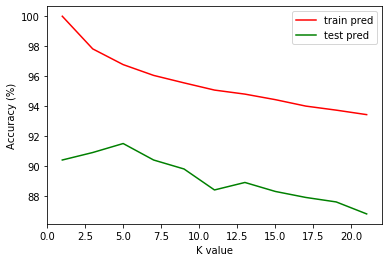

In [16]:
plt.plot(df_result['K value'], df_result['train pred'], 'r', label = 'train pred')
plt.plot(df_result['K value'], df_result['test pred'], 'g', label = 'test pred')
plt.legend(loc='upper right')
plt.xlabel('K value')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for train and test set')
plt.show()